<a href="https://colab.research.google.com/github/nikdrako/Machine-learning-projects/blob/main/Homework7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NeighborhoodComponentsAnalysis, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
columns_names = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']

In [ ]:
df = pd.read_csv('glass.data', header=None, names=columns_names, usecols=[1,2,3,4,5,6,7,8,9,10])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type of glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


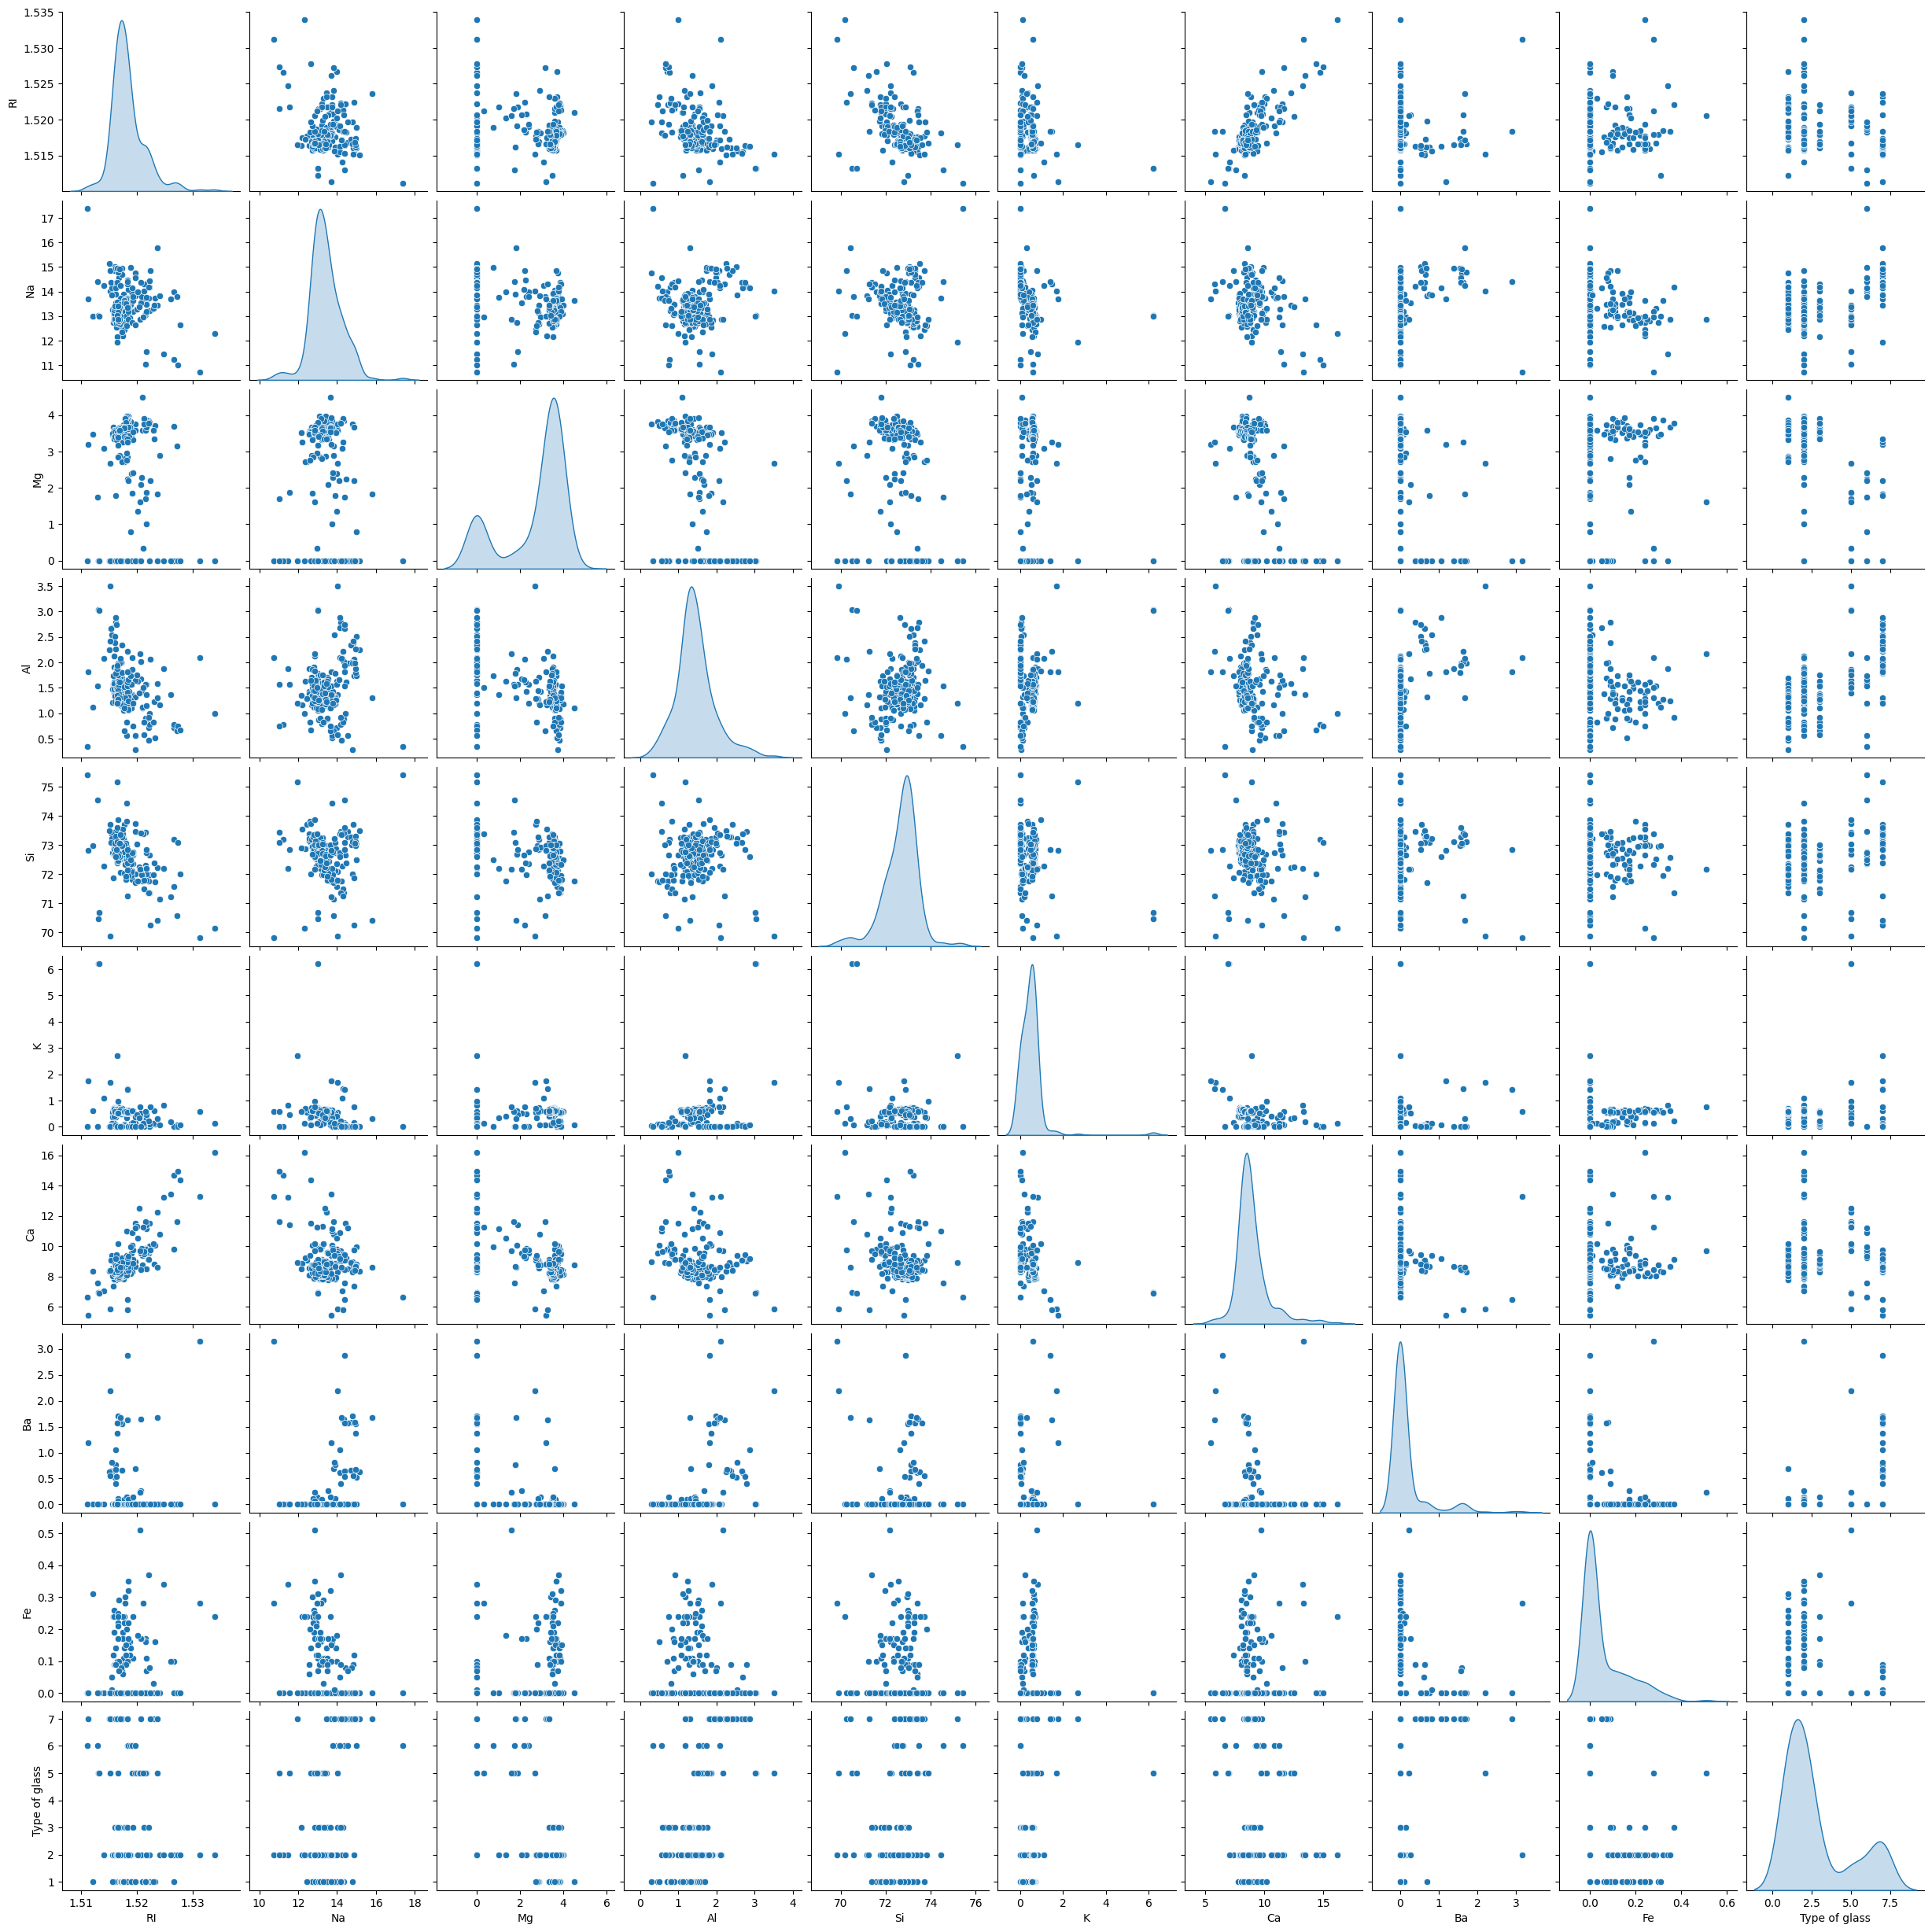

In [ ]:
sns.pairplot(df,diag_kind='kde')

Загальний огляд даних, дані досить дивно рокидані, тому що це вміст в склі.

<Axes: >

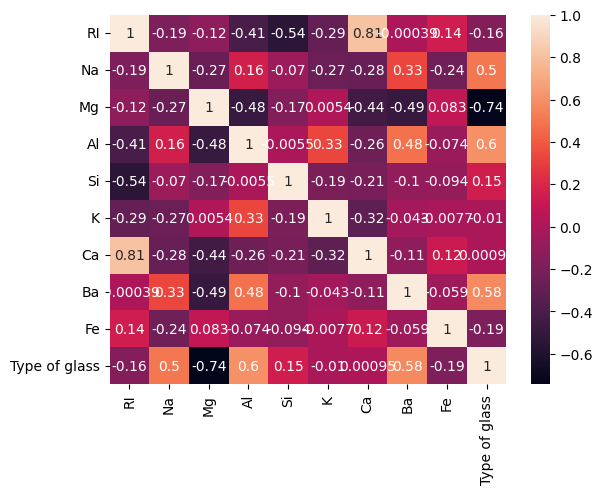

In [ ]:
corr_matr = df.corr()
sns.heatmap(corr_matr, annot= True)

Кореляційна матриця, бачимо граничну кореляцію, тому досліджу це питання.

<Axes: xlabel='RI', ylabel='Ca'>

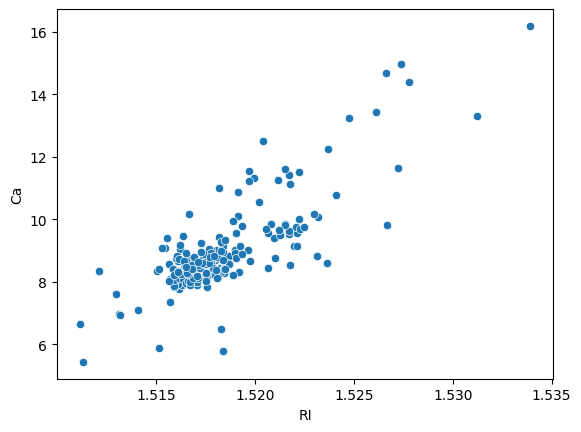

In [ ]:
sns.scatterplot(x= df['RI'], y = df['Ca'])

In [ ]:
#df.insert(0, 'Ca_and_RI', (df['Ca']+df['RI'])/2)
#df = df.drop(columns= ['Ca','RI'],axis = 1)
#Я пробував забрати кореляцію усередненням, а також вибірковими видаляннями (0.81 кореляція, але результати моделі дають кращі при наявності двох колонок, тому залишив так)
#df = df.drop(columns = 'RI',axis = 1)


In [ ]:
df['Type of glass'].value_counts()

,count
Type of glass,
2,76
1,70
7,29
3,17
5,13
6,9


In [ ]:
X = df.iloc[:,:-1]
y = df['Type of glass']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, stratify=y,random_state=42)

# Логістична регресія без балансування даних

In [ ]:
clf = LogisticRegression(solver="liblinear").fit(X_train, y_train)
roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

0.912968383684758

In [ ]:
y_pred = clf.predict(X_test)
print(f1_score(y_test,y_pred,average='weighted'))
print(precision_score(y_test,y_pred,average='weighted'))

0.7046546546546547
0.6974373363262253


# Логістична регресія з балансуванням даних


In [ ]:
from imblearn.over_sampling import SMOTE
X = df.iloc[:,:-1]
y = df['Type of glass']
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [ ]:
scaler2 = StandardScaler()
X_scaled_res = scaler2.fit_transform(X_res)

In [ ]:
X_train_res,X_test_res,y_train_res,y_test_res = train_test_split(X_scaled_res, y_res, stratify=y_res,random_state=42)

In [ ]:
clf = LogisticRegression(solver="liblinear").fit(X_train_res, y_train_res)
roc_auc_score(y_test_res, clf.predict_proba(X_test_res), multi_class='ovr')

0.9431209602954755

In [ ]:
y_pred_res = clf.predict(X_test_res)
print(f1_score(y_test_res,y_pred_res,average='weighted'))
print(precision_score(y_test_res,y_pred_res,average='weighted'))

0.7366386981947622
0.7404727599998386


# RadiusNeighborsClassifier без балансу

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier

rns = RadiusNeighborsClassifier(radius= 5 ,algorithm = 'auto',weights = 'distance')
rns.fit(X_train,y_train)
y_pred = rns.predict(X_test)
print(f1_score(y_test,y_pred,average='weighted'))
print(recall_score(y_test,y_pred,average='weighted'))
roc_auc_score(y_test, rns.predict_proba(X_test), multi_class='ovr')

0.5947971781305115
0.6296296296296297


0.9132078681577269

# RadiusNeighborsClassifier з балансуванням

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier

rns = RadiusNeighborsClassifier(radius= 5 ,algorithm = 'auto',weights = 'distance')
rns.fit(X_train_res,y_train_res)
y_pred = rns.predict(X_test_res)
print(f1_score(y_test_res,y_pred,average='weighted'))
print(recall_score(y_test_res,y_pred,average='weighted'))
roc_auc_score(y_test_res, rns.predict_proba(X_test_res), multi_class='ovr')

0.7101385582771976
0.7280701754385965


0.9634349030470913

# Інший метод балансування

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE
X = df.iloc[:,:-1]
y = df['Type of glass']
border = BorderlineSMOTE(random_state=42)
X_res,y_res = border.fit_resample(X,y)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_res, stratify=y_res,random_state=42)
clf = LogisticRegression(solver="liblinear").fit(X_train, y_train)
roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

0.9375807940904894

In [ ]:
y_pred_res = clf.predict(X_test)
print(f1_score(y_test,y_pred_res,average='weighted'))
print(precision_score(y_test,y_pred_res,average='weighted'))

0.7288471177944862
0.7411086244038189


In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier

rns = RadiusNeighborsClassifier(radius= 5 ,algorithm = 'auto',weights = 'distance')
rns.fit(X_train,y_train)
y_pred = rns.predict(X_test)
print(f1_score(y_test,y_pred,average='weighted'))
print(recall_score(y_test,y_pred,average='weighted'))
roc_auc_score(y_test, rns.predict_proba(X_test), multi_class='ovr')

0.7312185771744595
0.7456140350877193


0.9640812557710065

Як бачимо балансування даних додає точності в даних в межах 5% від результатів без балансування. Найкращим виявився BorderlineSMOTE в поєднанні з RadiusNeighborsClassifier